# Algorithms

We have used Regression and Classification to carry out the results.
These techniques are used to predict useful results from data in order to improve business efficiency as well as deploy new and effective measures to make profits in the future.

The purpose of regression analysis is to predict an outcome based on a historical data, like predicting the behavior of an dependent variable(people who buy a butter) based on independent variables(peoply who buy bread and milk).

Classifiaction uses decision tree classifiers on various sub-sets of a dataset and estimates over average of values to improve the predictive accuracy of the data. These can work with heavily unbalanced datasets having large number of missing values.

Since our data is very imbalanced we have used ROC Curve to predict the accuracy of each algorithm.

ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,accuracy_score,auc,roc_auc_score,average_precision_score,roc_curve,recall_score,classification_report 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
X=data.drop(['Class'], axis=1)
Y=data['Class']
X_data=X.values
y_data=Y.values
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1)

## Random Forest Classifier
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

It has many applications like to predict the drug sensitivity of a medicine, to identify the patient’s disease by analyzing medical records,predict behavior of the stock market, etc.

In [4]:
random_forest= RandomForestClassifier()
random_forest.fit(X_train,y_train)
pred = random_forest.predict(X_test)

Below, we can see the results exhibited by Random Forest Classifier; the accuracy, recall, f1-score, and support.

Also, the confusion matrix provides more insights into the data.

Random Forest classifier Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.90      0.72      0.80        87

    accuracy                           1.00     56962
   macro avg       0.95      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



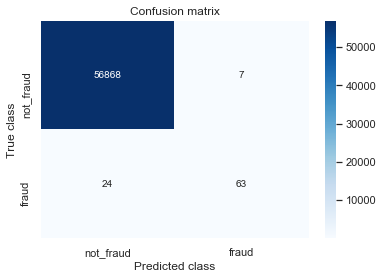

Accuracy:  0.9994557775359011


In [5]:
print("Random Forest classifier Results:\n")
print(classification_report(y_test, pred))
class_names = ['not_fraud', 'fraud']
confusion_mat = confusion_matrix(y_test, pred)
dataframe=pd.DataFrame(confusion_mat, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion matrix")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

print("Accuracy: ", accuracy_score(y_test,pred))

## ROC Curve for Random Forest


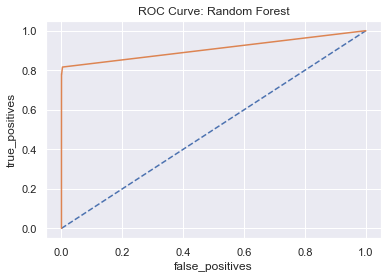

ROC AUC score:  0.9076395604395605


In [6]:
prob_predict = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, prob_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlabel("false_positives")
plt.ylabel("true_positives")
plt.title('ROC Curve: Random Forest')
plt.show()

print('ROC AUC score: ', roc_auc_score(y_test, prob_predict))

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

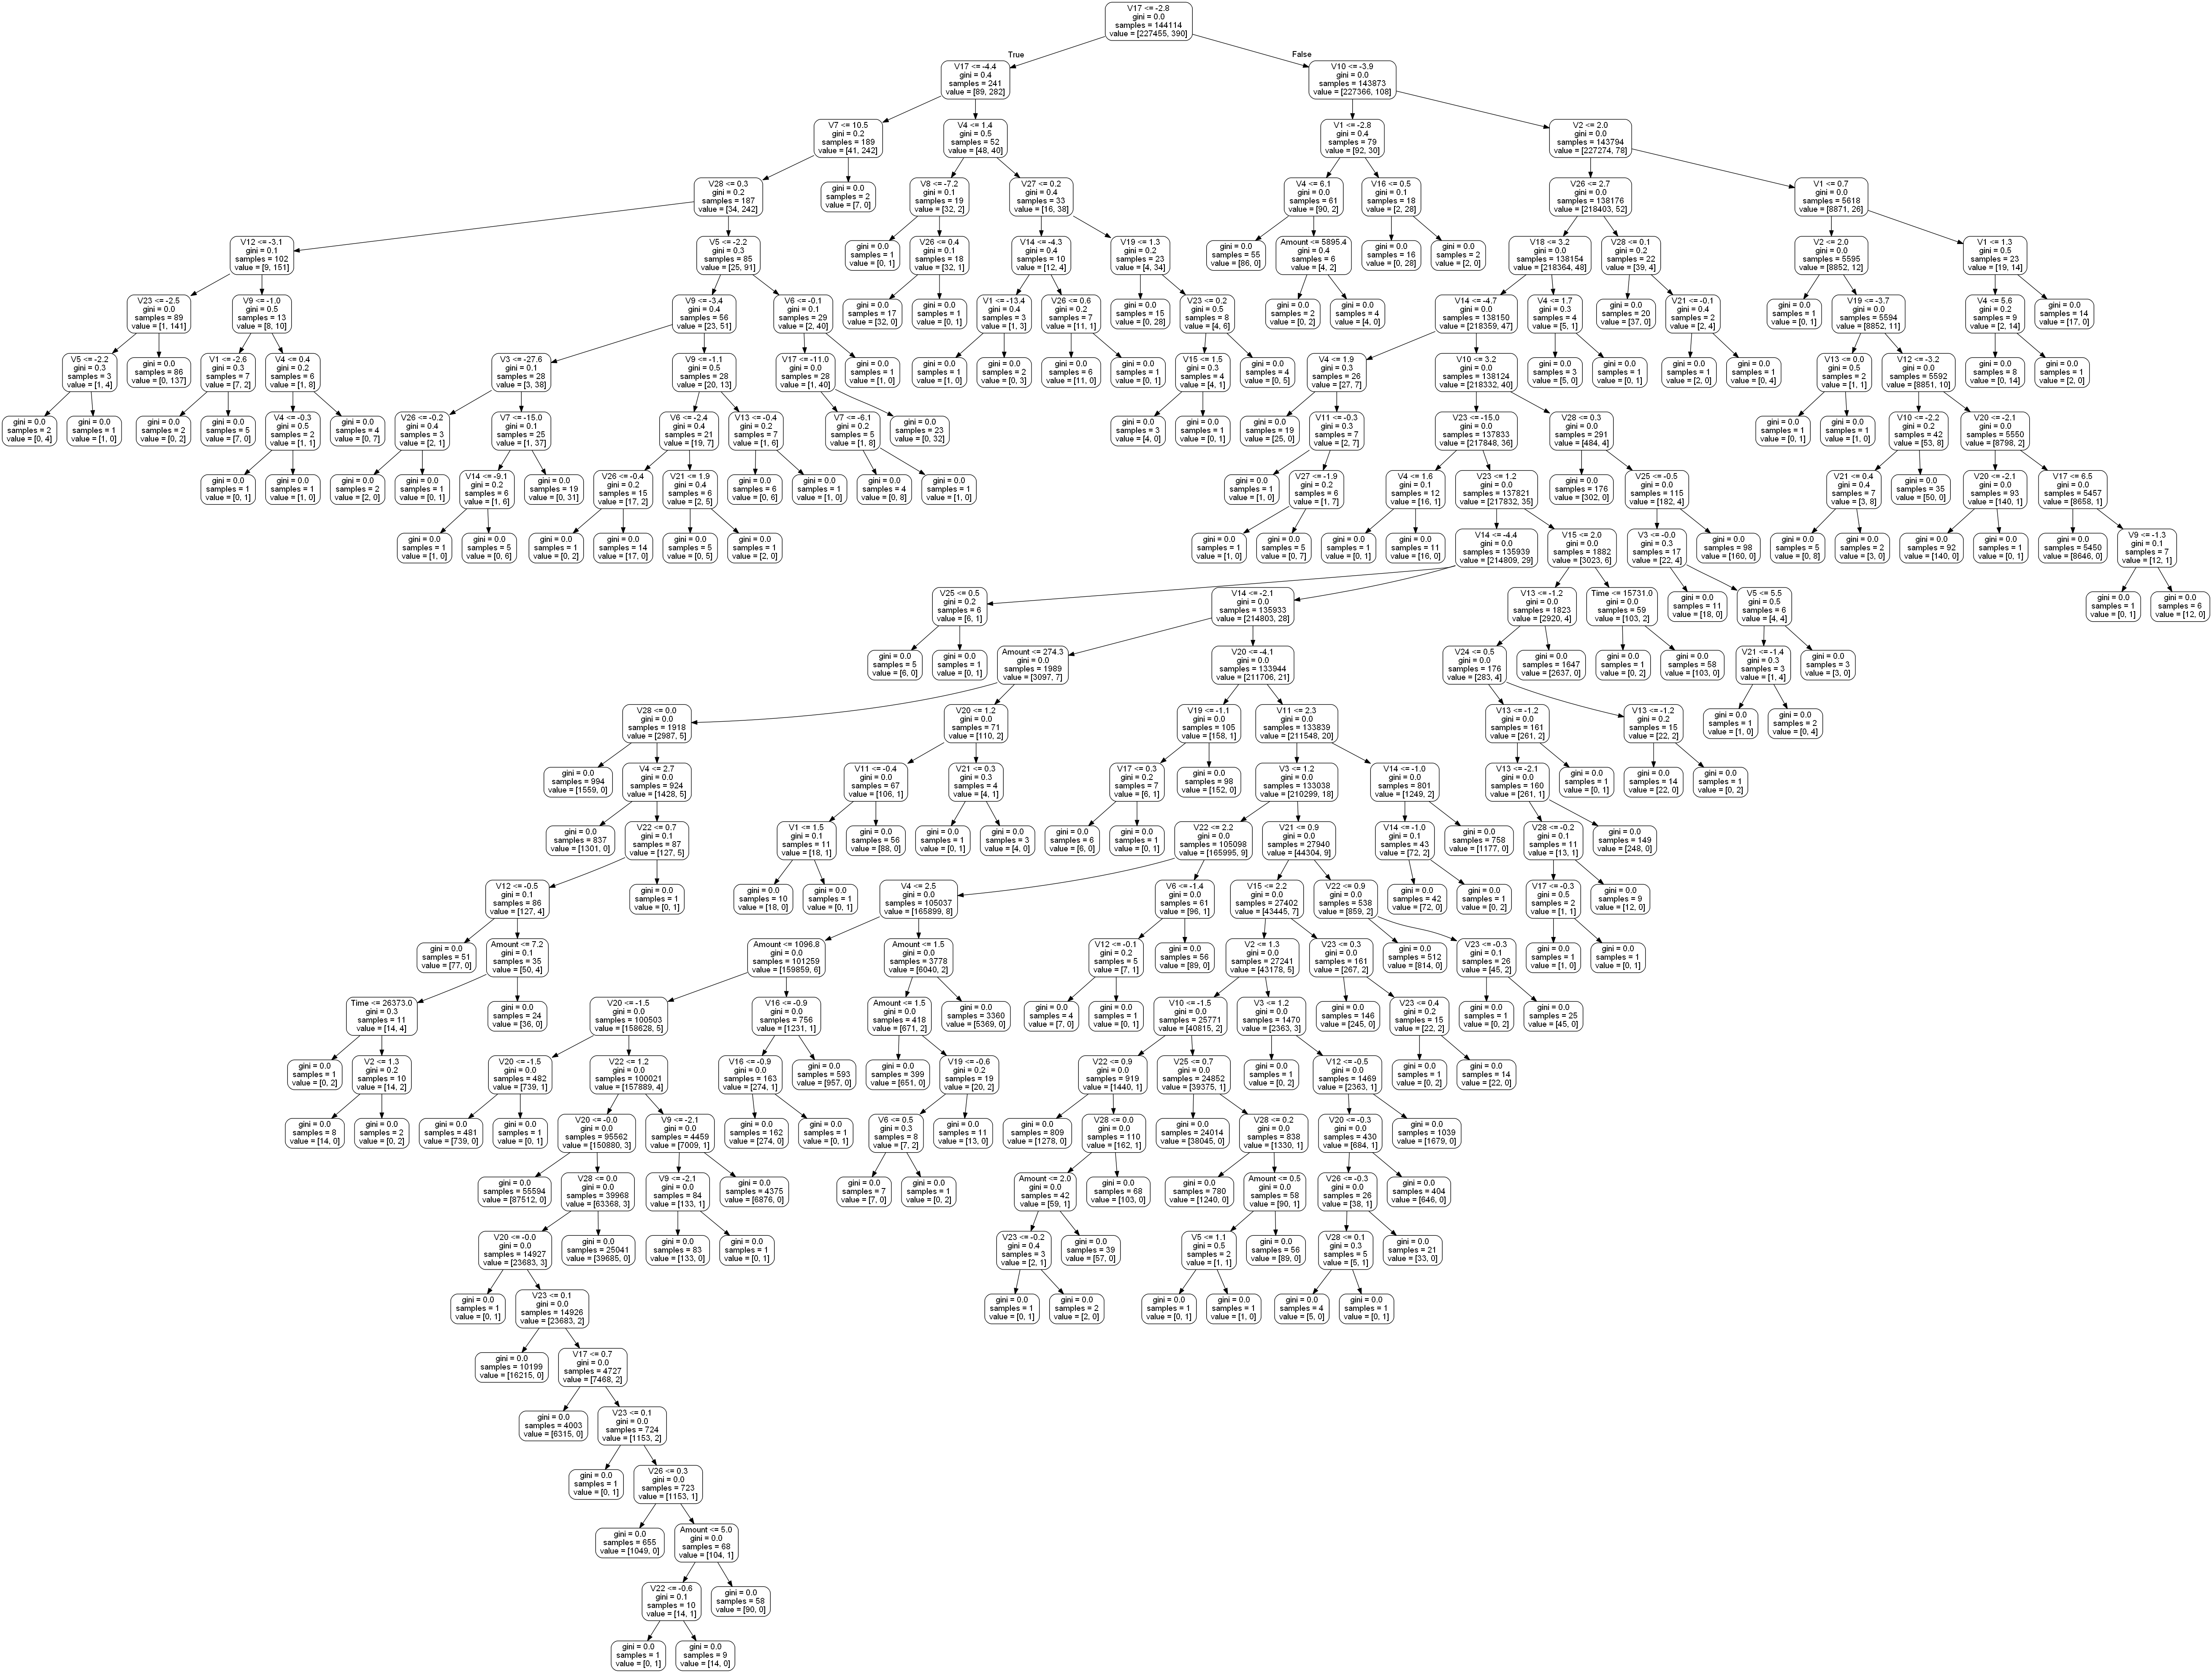

In [8]:
#visualizing the random tree 
feature_list = list(X.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot
#pulling out one tree from the forest
decision_tree = random_forest.estimators_[5]
export_graphviz(decision_tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

## Logistic Regression
In statistics, the logistic model is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

It is used in marketing applications such as  to predict a customer is to purchase a product or not, if a person chooses a certain career option, etc.

In [9]:
logistic_regression = LogisticRegression(solver = 'liblinear')
logistic_regression.fit(X_train, y_train)
pred = logistic_regression.predict(X_test)

Below, we can see the results exhibited by Logistic Regression; the accuracy, recall, f1-score, and support.

Also, the confusion matrix provides more insights into the data.

Logistic Regression Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.60      0.68        87

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



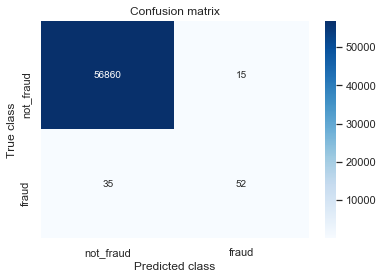

Accuracy:  0.9991222218320986


In [11]:
print("Logistic Regression Results:\n")
print(classification_report(y_test, pred))

class_names = ['not_fraud', 'fraud']
confusion_mat = confusion_matrix(y_test, pred)
dataframe=pd.DataFrame(confusion_mat, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion matrix")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


accuracy =logistic_regression.score(X_test, y_test)
print("Accuracy: ",accuracy)

## ROC Curve for Logistic Regression

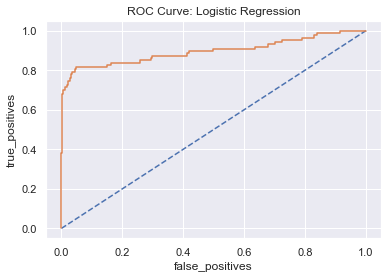

ROC AUC score: 0.8975205759757483


In [12]:
y_pred_prob = logistic_regression.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel("false_positives")
plt.ylabel("true_positives")
plt.title('ROC Curve: Logistic Regression')
plt.show()

print('ROC AUC score:', roc_auc_score(y_test, y_pred_prob))

## Support Vector Machine or SVM
Theses are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

It can be used to recognize handwritten characters, classification of images(higher accuracy), classification of compunds like protein with a precision of 90%, etc.

In [13]:
svm= svm.SVC(kernel= 'linear',C= 1, random_state= 0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

Below, we can see the results exhibited by Support Vector Machine; the accuracy, recall, f1-score, and support.

Also, the confusion matrix provides more insights into the data.

Support Vector Machine Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.60      0.68        87

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



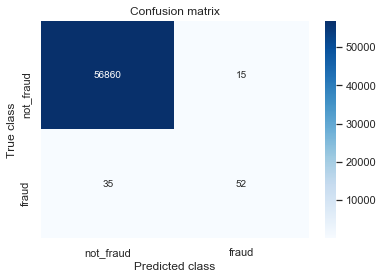

Accuracy:  0.9991222218320986


In [14]:
print("Support Vector Machine Results:\n")
print(classification_report(y_test, pred))

class_names = ['not_fraud', 'fraud']
confusion_mat = confusion_matrix(y_test, pred)
dataframe=pd.DataFrame(confusion_mat, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion matrix")
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

accuracy =logistic_regression.score(X_test, y_test)
print("Accuracy: ",accuracy)

## ROC Curve for SVM

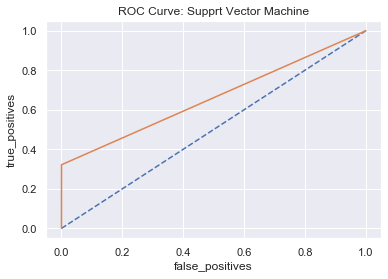

ROC AUC score: 0.8975205759757483


In [15]:
y_pred_prob = logistic_regression.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

plt.xlabel("false_positives")
plt.ylabel("true_positives")
plt.title('ROC Curve: Supprt Vector Machine')
plt.show()

print('ROC AUC score:', roc_auc_score(y_test, y_pred_prob))

## Conclusion

After carefully checking the data, analysing it, visualising the patterns, trends, and features and understanding relations between them, we come to the following conclusions.

We split the data into 2 parts:

- Train set

- Test set

This data was used with 3 models that are:

- Random Forest Classifier

- Logistic Regression

- Support Vector Machine

For the first model, Random Forest Classifier, we obtained an ROC_AUC_Score of 0.907 on predicting of the target with the test set.

For the second model, Logistic Regression, we obtained an ROC_AUC_Score of 0.897 on predicting the target with the test set.

For the third model, Support Vector Machine, we obtained an ROC_AUC_Score of 0.897 again, same as the previous result, on prediction of target with the test set.

This value lies between 0.5 and 1, where 0.5 denotes bad classifier and 1 denotes a good classifier.


## References
- https://en.wikipedia.org/wiki/Random_forest
- https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- https://en.wikipedia.org/wiki/Logistic_regression
- https://en.wikipedia.org/wiki/Support-vector_machine